In [18]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /home/annaj/codebase/learn_d2l/chap5
/home/annaj/codebase/learn_d2l already in Python path


In [19]:
import importlib
import d2l.classification as classification
importlib.reload(classification)
from d2l.classification import FashionMNIST, MLPClassifierTorch

In [20]:
import torch

In [21]:
rng = torch.Generator().manual_seed(42)

In [22]:
data = FashionMNIST()
mlp_model = MLPClassifierTorch(
    num_features=784, 
    num_outputs=10, 
    num_hiddens=[256, 256],
    lr=0.1, 
    rng=rng)

In [23]:
# Let's check the shape of the data
train_loader = data.get_train_dataloader(256)
for X, y in train_loader:
    print(f"Input shape: {X.shape}")
    print(f"Label shape: {y.shape}")
    break

Input shape: torch.Size([256, 1, 28, 28])
Label shape: torch.Size([256])


Test loss: 0.4363
Test accuracy: 84.08%
Test accuracy: 84.08%


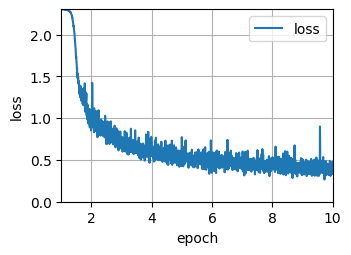

In [24]:
all_epoch_losses = mlp_model.train(data.get_train_dataloader_epochs(256, 10))
mlp_model.plot_loss(all_epoch_losses)
test_loss = mlp_model.test(data.get_test_dataloader(256))
print(f'Test loss: {test_loss:.4f}')
accuracy = mlp_model.accuracy(data.get_test_dataloader(256))
print(f'Test accuracy: {accuracy:.2%}')